In [3]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2
import scipy
from scipy import ndimage  # If you're using scipy.ndimage
from scipy import optimize  # If you're using scipy.optimize
from scipy.optimize import minimize



In [43]:
!pip install scipy


   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/42.2 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 5.0/42.2 MB 11.2 MB/s eta 0:00:04
   ------ --------------------------------- 7.3/42.2 MB 11.6 MB/s eta 0:00:04
   --------- ------------------------------ 10.0/42.2 MB 11.5 MB/s eta 0:00:03
   ----------- ---------------------------- 12.3/42.2 MB 11.5 MB/s eta 0:00:03
   ------------- -------------------------- 14.4/42.2 MB 11.1 MB/s eta 0:00:03
   --------------- ------------------------ 16.0/42.2 MB 10.3 MB/s eta 0:00:03
   ---------------- ----------------------- 17.6/42.2 MB 9.8 MB/s eta 0:00:03
   ----------------- ---------------------- 18.9/42.2 MB 9.4 MB/s eta 0:00:03
   ------------------- -------------------- 20.2/42.2 MB 9.0 MB/s eta 0:00:03
   -------------------- ------------------- 21.5/42.2 MB 8.8 MB/s eta 0:00:03
   --------------------- ------------------ 22.8/42.2 MB 8.6 MB/s et

In [72]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.13.0



In [6]:
import requests

url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
output_path = 'food-101.tar.gz'

# Download the dataset
print("Downloading the data...")
response = requests.get(url, stream=True)

# Check if the download was successful
if response.status_code == 200:
    with open(output_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print("Dataset downloaded successfully!")
else:
    print(f"Failed to download dataset. HTTP Status code: {response.status_code}")


Dataset downloaded successfully!


In [ ]:
import tarfile
import os

def extract_tar_gz(file_path, extract_to):
    """
    Extracts a .tar.gz file to a specified directory.

    Parameters:
    file_path (str): The path to the .tar.gz file.
    extract_to (str): The directory where the contents will be extracted.

    Returns:
    None
    """
    try:
        with tarfile.open(file_path, 'r:gz') as tar:
            # Ensure the target directory exists
            os.makedirs(extract_to, exist_ok=True)
            
            tar.extractall(path=extract_to)
            print(f"Extraction complete. Files extracted to {extract_to}")
    except Exception as e:
        print(f"Error extracting file: {e}")

# Specify the file path and extraction directory
file_path = r'C:\\Users\\Admin\\Downloads\\taskfive\\food-101.tar.gz'
extract_to = r'C:\\Users\\Admin\\Downloads\\taskfive\\extracted_files'

# Call the function to extract
extract_tar_gz(file_path, extract_to)


In [75]:
os.listdir('C:\\Users\\Admin\\Downloads\\taskfive\\food-101\\images')

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [76]:
os.listdir('C:\\Users\\Admin\\Downloads\\taskfive\\food-101\\meta')

['classes.txt',
 'labels.txt',
 'test.json',
 'test.txt',
 'train.json',
 'train.txt']

In [77]:
file_path = 'C:\\Users\\Admin\\Downloads\\taskfive\\food-101\\meta\\train.txt'

with open(file_path, 'r') as file:
    for i in range(10):  
        print(file.readline().strip())

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [78]:
file_path = 'C:\\Users\\Admin\\Downloads\\taskfive\\food-101\\meta\\classes.txt'

with open(file_path, 'r') as file:
    for i in range(10):  
        print(file.readline().strip())

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


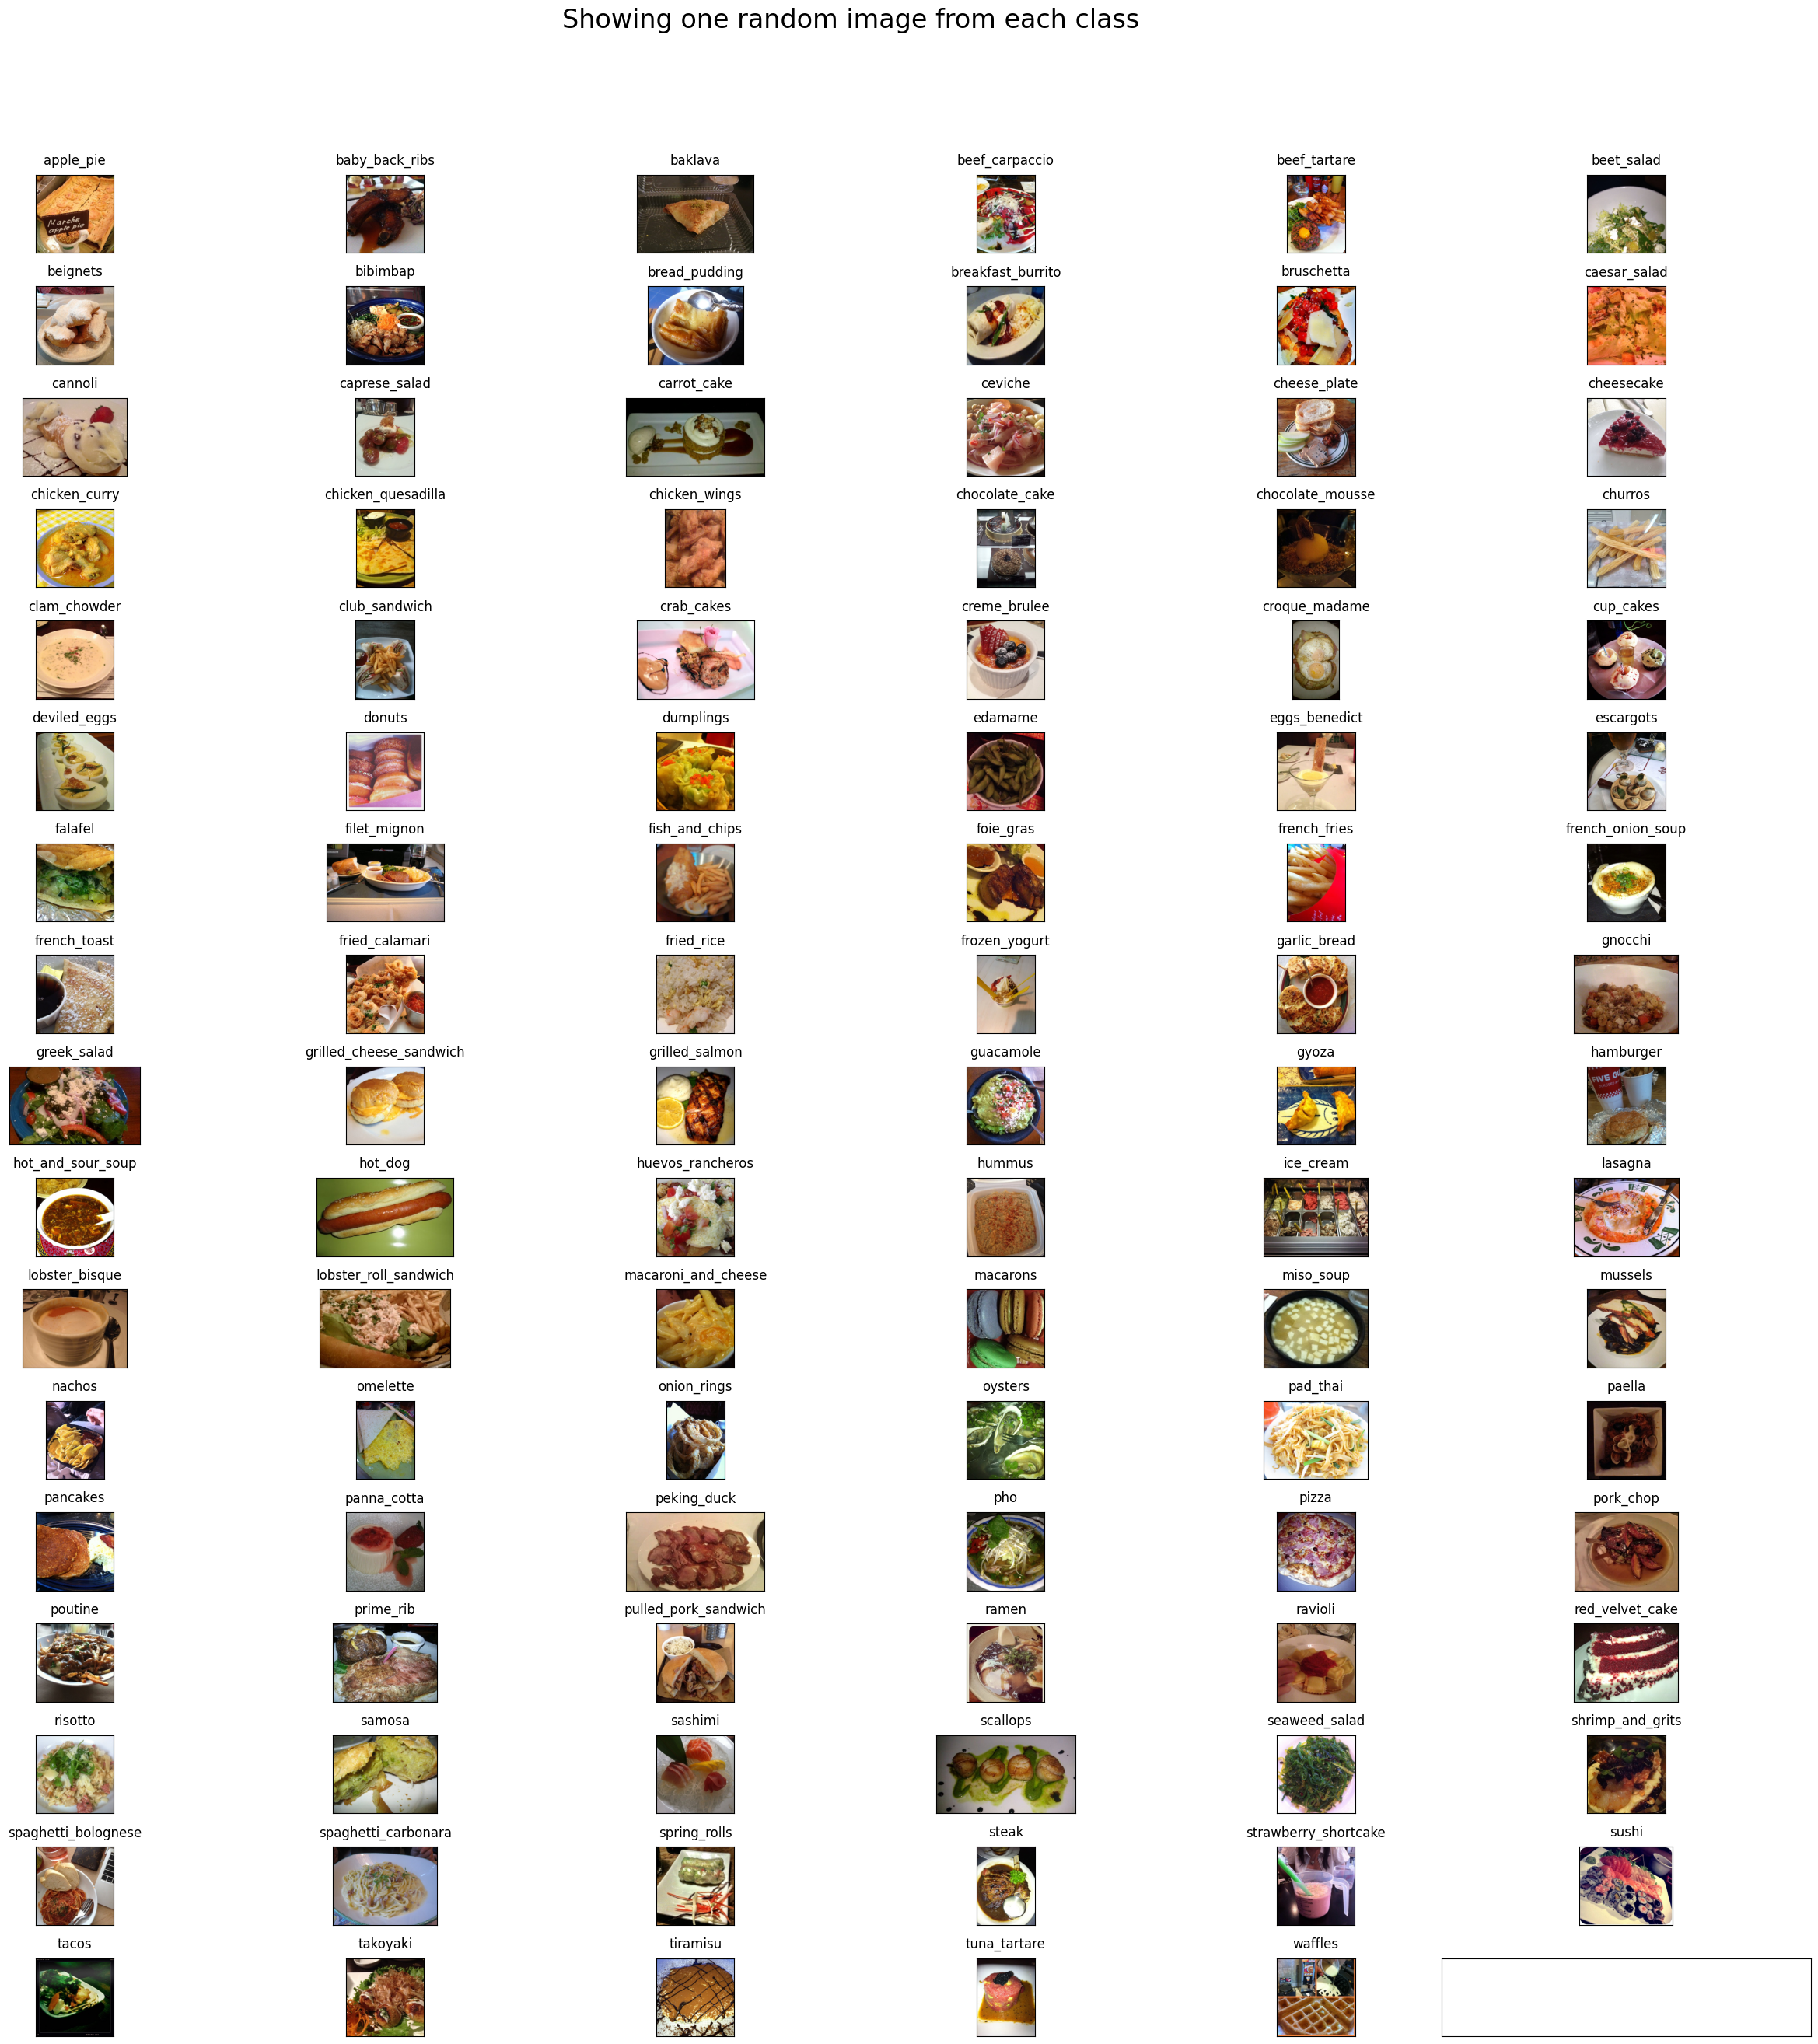

In [79]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = 'C:\\Users\\Admin\\Downloads\\taskfive\\food-101\\images\\'

foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


In [80]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [81]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('C:\\Users\\Admin\\Downloads\\taskfive\\food-101\meta\\train.txt', 'C:\\Users\\Admin\\Downloads\\taskfive\\food-101\\images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [ ]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('C:\\Users\\Admin\\Downloads\\taskfive\\food-101\meta\\test.txt', 'C:\\Users\\Admin\\Downloads\\taskfive\\food-101\\images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [15]:
import os

def count_files_in_directory(directory):
    # Count all files and subdirectories in the directory
    count = sum([len(files) for _, _, files in os.walk(directory)])
    return count

# Specify the train folder path
train_folder = 'C:\\Users\\Admin\\Downloads\\taskfive\\train'  # Replace with your actual train folder path

# Get the total number of files
total_files = count_files_in_directory(train_folder)
print(f"Total number of files in train folder: {total_files}")


Total number of files in train folder: 75750


In [16]:
import os

def count_files_in_directory(directory):
    """
    Counts the total number of files in a directory (including subdirectories).
    
    Parameters:
    directory (str): The directory to count files in.
    
    Returns:
    int: The total number of files in the directory.
    """
    count = sum([len(files) for _, _, files in os.walk(directory)])
    return count

# Specify the test folder path
test_folder = 'C:\\Users\\Admin\\Downloads\\taskfive\\test'  # Replace with your actual test folder path

# Get the total number of files
total_files = count_files_in_directory(test_folder)
print(f"Total number of files in test folder: {total_files}")


Total number of files in test folder: 25250


In [17]:
os.chdir('/')

### **Create a subset of data with few classes(3) - train_mini and test_mini for experimenting**

In [18]:
# List of all 101 types of foods(sorted alphabetically)
del foods_sorted[0] # remove .DS_Store from the list

In [19]:
foods_sorted

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [31]:
# Helper method to create train_mini and test_mini data samples
import os
import shutil

def dataset_mini(food_list, src, dest):
    # Remove the destination folder if it already exists
    if os.path.exists(dest):
        shutil.rmtree(dest)  # removes the 'dest' folder and its contents
    
    # Create the destination folder
    os.makedirs(dest)

    # Loop through each food item in the food list
    for food_item in food_list:
        print(f"Copying images into {food_item}")
        
        # Construct the source and destination paths
        src_path = os.path.join(src, food_item)
        dest_path = os.path.join(dest, food_item)
        
        # Check if the source directory exists
        if os.path.exists(src_path):
            # Copy the directory tree (including files) from src to dest
            shutil.copytree(src_path, dest_path)
        else:
            print(f"Source folder '{src_path}' does not exist.")

# Example usage:
# dataset_mini(food_list, 'path_to_src_train', 'path_to_dest_train')


In [34]:
# picking 3 food items and generating separate data folders for the same
food_list = ['apple_pie','pizza','omelette']
src_train = 'C:\\Users\\Admin\\Downloads\\taskfive\\train'
dest_train = 'C:\\Users\\Admin\\Downloads\\taskfive\\train_mini\\'
src_test = 'C:\\Users\\Admin\\Downloads\\taskfive\\test'
dest_test = 'C:\\Users\\Admin\\Downloads\\taskfive\\test_mini\\'

In [35]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [ ]:
import os

def count_files_in_directory(directory):
    """
    Counts all files (and directories) in a given directory, including subdirectories.
    
    Parameters:
    directory (str): Path to the directory to count files.
    
    Returns:
    int: Total number of files in the directory.
    """
    # Walk through the directory and count all files and directories
    count = sum([len(files) for _, _, files in os.walk(directory)])
    return count

# Specify the directory
train_folder = 'C:\\Users\\Admin\\Downloads\\taskfive\\train_mini'  # Change if your path is different

# Get the total number of files in the train folder
total_files = count_files_in_directory(train_folder)
print(f"Total number of files in train folder: {total_files}")


Total number of files in train folder: 2250


In [37]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [38]:
import os

def count_files_in_directory(directory):
    """
    Counts all files (and directories) in a given directory, including subdirectories.
    
    Parameters:
    directory (str): Path to the directory to count files.
    
    Returns:
    int: Total number of files in the directory.
    """
    # Walk through the directory and count all files and directories
    count = sum([len(files) for _, _, files in os.walk(directory)])
    return count

# Specify the directory
test_folder = 'C:\\Users\\Admin\\Downloads\\taskfive\\test_mini'  # Replace with the actual path if needed

# Get the total number of files in the test folder
total_files = count_files_in_directory(test_folder)
print(f"Total number of files in test folder: {total_files}")


Total number of files in test folder: 750


In [54]:
import scipy
print(scipy.__version__)


1.10.1


### **Fine tune ResNet50 Pretrained model using Food 101 dataset**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
import scipy
from scipy import ndimage
from keras import backend as K


K.clear_session()
n_classes = 3
img_width, img_height = 224, 224
train_data_dir = 'C:\\Users\\Admin\\Downloads\\taskfive\\train_mini'
validation_data_dir = 'C:\\Users\\Admin\\Downloads\\taskfive\\test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


resnet50 = ResNet50(weights='imagenet', include_top=False)
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=resnet50.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='C:\\Users\\Admin\\Downloads\\taskfive\\best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('C:\\Users\\Admin\\Downloads\\taskfive\\history_3class.log')

history = model.fit(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('C:\\Users\\Admin\\Downloads\\taskfive\\model_trained_3class.hdf5')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 0.8606 - accuracy: 0.6732 
Epoch 1: val_loss improved from inf to 3.10796, saving model to C:\Users\Admin\Downloads\taskfive\best_model_3class.hdf5


c:\Users\Admin\Downloads\taskfive\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


140/140 [==============================] - 1530s 11s/step - loss: 0.8606 - accuracy: 0.6732 - val_loss: 3.1080 - val_accuracy: 0.3329
Epoch 2/30
140/140 [==============================] - ETA: 0s - loss: 0.6236 - accuracy: 0.7690 
Epoch 2: val_loss improved from 3.10796 to 2.41671, saving model to C:\Users\Admin\Downloads\taskfive\best_model_3class.hdf5
140/140 [==============================] - 1695s 12s/step - loss: 0.6236 - accuracy: 0.7690 - val_loss: 2.4167 - val_accuracy: 0.3329
Epoch 3/30
140/140 [==============================] - ETA: 0s - loss: 0.5122 - accuracy: 0.8133 
Epoch 3: val_loss did not improve from 2.41671
140/140 [==============================] - 1884s 13s/step - loss: 0.5122 - accuracy: 0.8133 - val_loss: 2.6405 - val_accuracy: 0.3342
Epoch 4/30
140/140 [==============================] - ETA: 0s - loss: 0.3783 - accuracy: 0.8662
Epoch 4: val_loss improved from 2.41671 to 1.82327, saving model to C:\Users\Admin\Downloads\taskfive\best_model_3class.hdf5
140/140 [==

In [49]:
#!pip install --upgrade keras tensorflow
!pip install scipy


In [59]:
class_map_3 = train_generator.class_indices
class_map_3

{'apple_pie': 0, 'omelette': 1, 'pizza': 2}

### **Visualize the accuracy and loss plots**

In [60]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

In [61]:
plot_accuracy(history,'FOOD101-ResNet50')
plot_loss(history,'FOOD101-ResNet50')

NameError: name 'history' is not defined

### **Predicting classes for new images from internet using the best trained model**

In [ ]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('/kaggle/working/best_model_3class.hdf5',compile = False)

In [31]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [ ]:
# Make a list of downloaded images and test the trained model
images = []
images.append('applepie.jpg')
images.append('pizza.jpg')
images.append('omelette.jpg')
predict_class(model_best, images, True)

### **Fine tune ResNet50 model with 11 classes of data**

In [36]:
# Helper function to select n random food classes
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  return food_list

In [ ]:
# Lets try with more classes than just 3. Also, this time lets randomly pick the food classes
n = 11
food_list = pick_n_random_classes(n)
food_list = ['apple_pie', 'beef_carpaccio', 'bibimbap', 'cup_cakes', 'foie_gras', 'french_fries', 'garlic_bread', 'pizza', 'spring_rolls', 'spaghetti_carbonara', 'strawberry_shortcake']
print("These are the randomly picked food classes we will be training the model on...\n", food_list)

In [ ]:
# Create the new data subset of n classes
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)

In [ ]:
print("Total number of samples in train folder")
!find train_mini/ -type d -or -type f -printf '.' | wc -c

In [ ]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

In [ ]:
print("Total number of samples in test folder")
!find test_mini/ -type d -or -type f -printf '.' | wc -c

In [ ]:
# Let's use a pretrained Inceptionv3 model on subset of data with 11 food classes
K.clear_session()

n_classes = n
img_width, img_height = 224, 224
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 8250 #75750
nb_validation_samples = 2750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


resnet50 = ResNet50(weights='imagenet', include_top=False)
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=resnet50.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_11class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_11class.log')

history_11class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_11class.hdf5')

In [ ]:
class_map_11 = train_generator.class_indices
class_map_11

In [ ]:
plot_accuracy(history_11class,'FOOD101-ResNet50')
plot_loss(history_11class,'FOOD101-ResNet50')

In [ ]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('/kaggle/working/best_model_11class.hdf5',compile = False)

In [ ]:
# Make a list of downloaded images and test the trained model
images = []
images.append('cupcakes.jpg')
# images.append('pizza.jpg')
images.append('springrolls.jpg')
images.append('garlicbread.jpg')
predict_class(model_best, images, True)

In [48]:
os.chdir("AbdulQadeer/Dataset/")

In [49]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)